In [1]:
import pandas as pd 
import os 
import seaborn as sns 
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from tqdm import tqdm

In [2]:
data = pd.read_csv('../dataset/data.csv', encoding="ISO-8859-1")

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [5]:
data['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [6]:
data.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.dropna(axis=0, subset=['CustomerID'], inplace=True)
data.drop_duplicates(inplace = True)

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Customers and products

In [9]:
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),
              'transactions': len(data['InvoiceNo'].value_counts()),
              'customers': len(data['CustomerID'].value_counts()),
              }], columns = ['products', 'transactions', 'customers'], index=['quality'])

,products,transactions,customers
quality,3684,22190,4372


In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Number of products purchased in every transaction

In [11]:
df_temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df_temp = df_temp.rename(columns={'InvoiceDate': 'Number of products'})
df_temp

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,50
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


/home/dmk/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of products', ylabel='count'>

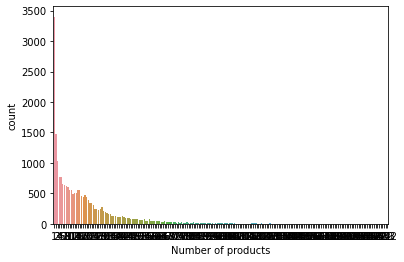

In [12]:
sns.countplot(df_temp['Number of products'])

In [13]:
df_temp.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.098423
std,1733.149624,23.363888
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


### Order cancled

In [14]:
df_temp['order_canceled'] = df_temp['InvoiceNo'].apply(lambda x: int('C' in x))

In [15]:
df_temp

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [16]:
print(f"Number percentage of orders canceld: {df_temp['order_canceled'].sum() / len(df_temp) *100}%")

Number percentage of orders canceld: 16.466876971608833%


In [17]:
display(data.sort_values('CustomerID')[:10])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14947,537626,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland


In above dataframe, we see that when an order is canceled, we have another transactions in the dataframe, mostly indentical exept of the Quantity and InvoiceDate variable

In [18]:
df_check = data[data['Quantity'] < 0][['CustomerID', 'Quantity', 'StockCode', 'Description', 'UnitPrice']]

for index, row in tqdm(df_check.iterrows(), total=len(df_check)):
    if data[(data['CustomerID'] == row['CustomerID']) & (data['Quantity'] == -row['Quantity']) & (data['Description'] == row['Description'])].shape[0] == 0:
        print(df_check.loc[index])
        print("Hypothesis isn't true")
        break

  0%|                                                                                        | 0/8872 [00:00<?, ?it/s]

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
Hypothesis isn't true


In [19]:
df_check = data[(data['Quantity'] < 0) & (data['Description'] != 'Discount')][['CustomerID', 'Quantity', 'StockCode', 'Description', 'UnitPrice']]

for index, row in tqdm(df_check.iterrows(), total=len(df_check)):
    if data[(data['CustomerID'] == row['CustomerID']) & (data['Quantity'] == -row['Quantity']) & (data['Description'] == row['Description'])].shape[0] == 0:
        print(df_check.loc[index])
        print("Hypothesis isn't true")
        break

  0%|                                                                                        | 0/8795 [00:00<?, ?it/s]

CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
Hypothesis isn't true


In [20]:
df_cleaned = data.copy(deep=True)
df_cleaned['QuantityCanceled'] = 0

In [21]:

entry_to_remove, dobtfull_entry = [], []

for idx, row in tqdm(data.iterrows(), total=len(data)):
    if row['Quantity'] > 0 or row['Description'] == "Discount":
        continue 
    
    df_test = data[(data['CustomerID'] == row['CustomerID']) & 
                  (data['StockCode'] == row['StockCode']) &
                  (data['InvoiceDate'] < row['InvoiceDate']) &
                  (data['Quantity'] > 0)].copy()
    
    if len(df_test) == 0:
        dobtfull_entry.append(idx)
    
    elif len(df_test) == 1:
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = - row['Quantity']
        entry_to_remove.append(idx)
    elif len(df_test) > 1:
        df_test.sort_index(axis=0, ascending=False, inplace=True)
        for index, row_df_test in df_test.iterrows():
            if row_df_test['Quantity'] < -row['Quantity']:
                continue 
            df_cleaned.loc[index, 'QuantityCanceled'] = -row['Quantity']
            entry_to_remove.append(idx)
            break
            
        
    

100%|███████████████████████████████████████████████████████████████████████| 401604/401604 [05:38<00:00, 1187.20it/s]


In [22]:
print(len(dobtfull_entry))
print(len(entry_to_remove))

1226
7521


In [23]:
df_cleaned.drop(dobtfull_entry, axis=0, inplace=True)
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)

In [24]:
df_cleaned.to_csv('../dataset/df_cleaned.csv')